# EDA of data

In [1]:
import os
import re
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

COLOR = 'white'
plt.rcParams['text.color'       ] = COLOR
plt.rcParams['text.color'       ] = COLOR
plt.rcParams['axes.labelcolor'  ] = COLOR
plt.rcParams['xtick.color'      ] = COLOR
plt.rcParams['ytick.color'      ] = COLOR

## UC IPM data - December 2021 Scrape

In [ ]:
_PATH = Path('../data/uc-ipm/scrape_cleaned_Dec2021/')
DATA_FILE_NAMES = sorted(_PATH.iterdir())
[data_file.name for data_file in DATA_FILE_NAMES]

The list of files should be as following:
```python
['exoticPests.json',
 'fruitItems_new.json',
 'fruitVeggieEnvironItems_new.json',
 'pestDiseaseItems_new.json',
 'plantFlowerItems.json',
 'turfPests.json',
 'veggieItems_new.json',
 'weedItems.json']
```

The corresponding EDA for these sources (links):
* [`exoticPests.json`](#exoticpestsjson)
* [`fruitItems_new.json`](#fruititems_newjson)
* [`fruitVeggieEnvironItems_new.json`](#fruitveggieenvironitems_newjson)
* [`pestDiseaseItems_new.json`](#pestdiseaseitems_newjson)
* [`plantFlowerItems.json`](#plantfloweritemsjson)
* [`turfPests.json`](#turfpestsjson)
* [`veggieItems_new.json`](#veggieitems_newjson)
* [`weedItems.json`](#weeditemsjson)

### Pests - exotic types
<a id='exoticpestsjson'></a>

In [ ]:
FILE_NAME = 'exoticPests.json'
df = pd.read_json(Path.joinpath(_PATH, FILE_NAME))
df.info()

In [ ]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

In [ ]:
df.sample(5)

In [ ]:
text_columns = ['name', 'description', 'damage', 'identification', 'life_cycle', 'monitoring', 'management']
fig, axes = plt.subplots(3, 3, figsize = (30, 15))
for i, col in enumerate(text_columns):
    r = i//3
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

__Exotic pests - `exoticPests.json`__

| column         | type                     |
|----------------|--------------------------|
| name           | string                   |
| url            | string                   |
| description    | string                   |
| damage         | string                   |
| identification | string                   |
| life_cycle     | string                   |
| monitoring     | string                   |
| management     | string                   |
| related_links  | [{text: " ", link: " "}] |

Example of the single JSON data entry:
```json
{
    "name": "European Grapevine Moth",
    "url": "https://www2.ipm.ucanr.edu/Invasive-and-Exotic-Pests/European-grapevine-moth/?src=exchbt",
    "description": "Lobesia botrana, the European grapevine moth, was first reported in the United ...",
    "damage": "In May and June, first-generation larvae web and feed on the flower clusters. Secon...",
    "identification": "The adult moth is approximately 0.24 to 0.3 inch (6-8 mm) long, with a wing...",
    "life_cycle": "European grapevine moth has two generations in its life cycle in northern Europ...",
    "monitoring": "Sex pheromone attracts males and is used to monitor male flights. Before bud br...",
    "management": "In countries where L. botrana is established, control measures are targeted at ...",
    "related_links": [
        {
        "text": "Grape pest management guidelines",
        "link": "http://ipm.ucanr.edu/PMG/selectnewpest.grapes.html?src=exchbt"
        },
        {
        "text": "Video presentation",
        "link": "http://stream.ucanr.org/ipm_ag_urban/evgm2011/?src=exchbt"
        }
    ],
    "images": [
        {
        "link": "http://ipm.ucanr.edu/PMG/L/I-LP-LBOT-AD.002.html?src=exchbt",
        "src": "http://ipm.ucanr.edu/PMG/IMAGES/L/I-LP-LBOT-AD.002h.jpg?src=exchbt",
        "caption": "Adult female European grapevine moth."
        },
        {
        "link": "http://ipm.ucanr.edu/PMG/L/I-LP-LBOT-CD.004.html?src=exchbt",
        "src": "http://ipm.ucanr.edu/PMG/IMAGES/L/I-LP-LBOT-CD.004h.jpg?src=exchbt",
        "caption": "Grape bunches with webbing, frass, and fungal infections."
        },
        ...
    ]
}
```

__Metadata on data source__

Information on exotic pests.

Notes:
* `description`, `damage`, `identification`, `life_cycle`, `monitoring`, `management` - main fields.
* `related_links/text`, `images/caption` - additional fields.
    
Out of 15-20 source, only 2 have description field filled.

### Information - fruits
<a id='fruititems_newjson'></a>

In [ ]:
FILE_NAME = 'fruitItems_new.json'
df = pd.read_json(Path.joinpath(_PATH, FILE_NAME))
df.info()

In [ ]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

In [ ]:
df.sample(5)

__Fruits - `fruitItems_new.json`__

| column              | type                      |
|---------------------|---------------------------|
| name                | string                    |
| url                 | string                    |
| cultural_tips       | [{tip: "", link: ""}]     |
| pests_and_disorders | [{problem: "", link: ""}] |

Example of the single JSON data entry:
```json
{
    "name": "Figs",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/figs.html?src=exchbt",
    "cultural_tips": [
        {
            "tip": "Fertilizing",
            "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/fgfertilizing.html?src=exchbt"
        },
        {
            "tip": "First-year pruning",
            "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/almondfirst.html?src=exchbt"
        },
        ...
    ],
    "pests_and_disorders": [
        {
            "problem": "Ants",
            "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7411.html?src=exchbt"
        },
        {
            "problem": "Carpenterworm",
            "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn74105.html?src=exchbt"
        },
        ...
    ]
}
```
__Metadata on data source__

Information on fruits. Name with cultural tips and problems can be used to search for the queries. Following slots can be used - `plant_name`, `problem`.

Notes:
* Concatenate `name` and `cultural_tips/tip` - additional field.
* Concatenate `name` and `pests_and_disorders/problem` - additional field.

### Environmental damages - fruits and veggies
<a id='fruitveggieenvironitems_newjson'></a>

In [ ]:
FILE_NAME = 'fruitVeggieEnvironItems_new.json'
df = pd.read_json(Path.joinpath(_PATH, FILE_NAME))
df.info()

In [ ]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

In [ ]:
df.sample(5)

In [ ]:
text_columns = ['name', 'description', 'identification', 'damage', 'disorder_development', 'solutions']
fig, axes = plt.subplots(2, 3, figsize = (30, 10))
for i, col in enumerate(text_columns):
    r = i//3
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

__Environment Fruit and Veggie - `fruitVeggieEnvironItems_new.json`__

| column               | type                                  |
|----------------------|---------------------------------------|
| name                 | string                                |
| url                  | string                                |
| description          | string                                |
| identification       | string                                |
| damage               | string                                |
| disorder_development | string                                |
| solutions            | string                                |
| images               | [{link: " ", src: " ", caption: " "}] |

Example of the single JSON data entry:
```json
{
    "name": "Wind",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/wind.html?src=exchbt",
    "description": "Wind can damage bark, flowers, foliage, fruit, and limbs of most any...",
    "identification": "Plants growing at windy sites often have smaller-than-normal leaves...",
    "damage": "Wind-damaged leaves become necrotic along the margins and tips and drop prema...",
    "disorder_development": "Wind commonly causes water deficit. If soil moisture is low, or w...",
    "solutions": "Provide plants with proper cultural care, especially appropriate irrigation...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/W/A-WO-WEAT-FS.002.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/W/A-WO-WEAT-FS.002a.jpg?src=exchbt",
            "caption": "Wind-sculptured cypress"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/W/A-WO-WEAT-FO.041.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/W/A-WO-WEAT-FO.041a.jpg?src=exchbt",
            "caption": "Necrotic, wind-tattered leaves"
        },
        ...
    ]
}
```

__Metadata on data source__

Environment caused problems on veggies and fruites. `problem_description` can be used to find matches.

Notes:
* `name`, `description`, `identification`, `damage`, `disorder_development`, `solutions` - main fields
* `images/caption` - additional fields

### Pests - causing diseases
<a id='pestdiseaseitems_newjson'></a>

In [ ]:
FILE_NAME = 'pestDiseaseItems_new.json'
df = pd.read_json(Path.joinpath(_PATH, FILE_NAME))
df.info()

In [ ]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

In [ ]:
df.sample(5)

In [ ]:
text_columns = ['name', 'description', 'identification', 'life_cycle', 'damage', 'solutions']
fig, axes = plt.subplots(2, 3, figsize = (30, 10))
for i, col in enumerate(text_columns):
    r = i//3
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

__Pest Diseases - `pestDiseasesItems_new.json`__

| column         | type                                  |
|----------------|---------------------------------------|
| name           | string                                |
| url            | string                                |
| description    | string                                |
| identification | string                                |
| life_cycle     | string                                |
| damage         | string                                |
| solutions      | string                                |
| images         | [{link: " ", src: " ", caption: " "}] |


Example of the single JSON data entry:

```json
{
    "name": "Stink bugs",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/PESTS/stinkbug.html?src=exchbt",
    "description": "These sucking insects (family Pentatomidae) are shield shaped. Their common ...",
    "identification": "Adult stink bugs are distinguished from other insects by the large ...",
    "life_cycle": "Stink bugs develop through three life stages: egg, nymph, and adult. ...",
    "damage": "Adults suck and feed on plants with their strawlike mouthparts. Stink bugs ...",
    "solutions": "Handpick the bugs and their eggs from small plants. Eliminate groundcovers...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/E/I-HM-ECON-AD.015.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/E/I-HM-ECON-AD.015a.jpg?src=exchbt",
            "caption": "Adults of southern green stink bug (left), redshouldered stink bug, (upper right) and consperse stink bug."
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/E/I-HM-ECON-EG.001.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/E/I-HM-ECON-EG.001b.jpg?src=exchbt",
            "caption": "First instars of consperse stink bug and their empty egg cases."
        },
        ...
    ]
},
```

__Metadata on data source__

Information on pests.

### Information - flowers
<a id='plantfloweritemsjson'></a>

In [ ]:
FILE_NAME = 'plantFlowerItems.json'
df = pd.read_json(Path.joinpath(_PATH, FILE_NAME))
df.info()

In [ ]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

In [ ]:
df.sample(5)

In [ ]:
text_columns = ['name', 'identification', 'optimum_conditions']
fig, axes = plt.subplots(1, 3, figsize = (30, 5))
for i, col in enumerate(text_columns):
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[c])
    axes[c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

__Flowers - `plantFlowerItems.json`__

| column              | type                        |
|---------------------|-----------------------------|
| name                | string                      |
| url                 | string                      |
| identification      | string                      |
| optimum_conditions  | string                      |
| pests_and_disorders | [{problem: " ", link: " "}] |

Example of the single JSON data entry:
```json
{
    "name": "Abelia",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/abelia.html?src=exchbt",
    "identification": "Abelias are evergreen or semievergreen deciduous shrubs. Leaves are ...",
    "optimum_conditions": "Abelias can be planted as borders or barriers. Varieties that ...",
    "pests_and_disorders": [
        {
            "problem": "Root knot nematodes",
            "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7489.html?src=exchbt"
        },
        {
            "problem": "Mineral deficiencies",
            "link": "http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/mineraldef.html?src=exchbt"
        },
        ...
    ],
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/C/S-WO-CAPR-FL.017.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/C/S-WO-CAPR-FL.017a.jpg?src=exchbt",
            "caption": "Abelia flowers"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/C/S-WO-CAPR-FO.011.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/C/S-WO-CAPR-FO.011a.jpg?src=exchbt",
            "caption": "LEaves of Abelia"
        }
    ]
}
```
__Metadata on data source__

Description of the flowers.

* `name` and `pest_and_disorders` - main fields
* `images/caption` - additional fields


### Pests - turf (grass)
<a id='plantfloweritemsjson'></a>

In [ ]:
FILE_NAME = 'turfPests.json'
df = pd.read_json(Path.joinpath(_PATH, FILE_NAME))
df.info()

In [ ]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

In [ ]:
df.sample(5)

In [ ]:
text_columns = ['name', 'text']
fig, axes = plt.subplots(1, 2, figsize = (30, 5))
for i, col in enumerate(text_columns):
    c = i%2
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[c])
    axes[c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

__Turf Pests - `turfPests.json`__

| column | type                                  |
|--------|---------------------------------------|
| name   | string                                |
| url    | string                                |
| text   | string                                |
| images | [{link: " ", src: " ", caption: " "}] |

Example of the single JSON data entry:

```json
{
    "name": "Fiery skipper",
    "url": "http://ipm.ucanr.edu/TOOLS/TURF/PESTS/inskipper.html?src=exchbt",
    "text": "Identification Fiery skipper adults resemble butterflies and are 1 inch...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/H/I-LP-HPHY-AD.003.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/infieryad.jpg?src=exchbt",
            "caption": "Fiery skipper adult"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/H/I-LP-HPHY-LV.009.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/inskiplv.jpg?src=exchbt",
            "caption": "Skipper larva with dark head and thoracic shield"
        },
        ...
    ]
},
```
__Metadata on data source__

Inoformation on turf pests (grass).

### Information - veggies
<a id='veggieitems_newjson'></a>

In [ ]:
FILE_NAME = 'veggieItems_new.json'
df = pd.read_json(Path.joinpath(_PATH, FILE_NAME))
df.info()

In [ ]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

In [ ]:
df.sample(5)

In [ ]:
text_columns = ['name', 'description', 'tips']
fig, axes = plt.subplots(1, 3, figsize = (30, 5))
for i, col in enumerate(text_columns):
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[c])
    axes[c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

__Veggie - `veggieItems_new.json`__

| column              | type                                  |
|---------------------|---------------------------------------|
| name                | string                                |
| url                 | string                                |
| description         | string                                |
| tips                | string                                |
| images              | [{link: " ", src: " ", caption: " "}] |
| pests_and_disorders | [{problem: "", link: ""}]             |

Example of the single JSON data entry:
```json
{
    "name": "Carrot ",
    "url": "http://ipm.ucanr.edu/home-and-landscape/carrot/index.html?src=exchbt",
    "description": "Carrots can be grown nearly year-round throughout California. A number of vari...",
    "tips": "Cultural practices such as proper site selection, soil preparation, planting, and wat...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/P/D-CA-PVIO-RO.002.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/P/D-CA-PVIO-RO.002.jpg?src=exchbt",
            "caption": "Cavity spot-induced, irregularly shaped lesions across mature carrot tap roots."
        },
        ...
    ],
    "pests_and_disorders": [
        {
            "problem": "Aphids",
            "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7404.html?src=exchbt"
        },
        {
            "problem": "Carrot rust fly",
            "link": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/PESTS/carrotrustfly.html?src=exchbt"
        },
        ...
    ]
}
```

__Metadata on data source__

Information on vegetables. `plant_name`, and `problem` can be used to search this data source.

Notes:
* `name`, `description`, `tips` - main fields.
* `images/caption` additional field.
* concatenate `name` + `pests_and_disorders` -  additional field.


### Environmental damages - weeds
<a id='weeditemsjson'></a>

In [ ]:
FILE_NAME = 'weedItems.json'
df = pd.read_json(Path.joinpath(_PATH, FILE_NAME))
df.info()

In [ ]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

In [ ]:
df.sample(5)

In [ ]:
text_columns = ['name', 'description']
fig, axes = plt.subplots(1, 2, figsize = (30, 5))
for i, col in enumerate(text_columns):
    c = i%2
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[c])
    axes[c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

__Weed - `weedItems.json`__

| column      | type                        |
|-------------|-----------------------------|
| name        | string                      |
| url         | string                      |
| description | string                      |
| images      | [{link: " ", caption: " "}] |

Example of the single JSON data entry:
```json
{
    "name": "Gregg arrowhead",
    "url": "http://ipm.ucanr.edu/PMG/WEEDS/gregg_arrowhead.html?src=exchbt",
    "description": "Gregg arrowhead is a native aquatic perennial that occurs in the...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/S/W-AL-SMON-MP.003.html?src=exchbt",
            "caption": "top picture"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/S/W-AL-SLON-SG.001.html?src=exchbt",
            "caption": "bottom left picture"
        },
        ...
    ]
}
```

__Metadata on data source__

Description of the weed (problematic). Weed is any plant growing in cultivated ground to the injury of the crop or desired vegetation.

### Final transformations

There is going to be single merged index consisting of the following:

__`Problems` index__
```json
[
    {
        "source": "ucipm",
        "name": "Stink bugs",                                                                                       # title
        "url": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/PESTS/stinkbug.html?src=exchbt",                              # url
        "description": "These sucking insects (family Pentatomidae) are shield shaped. The...",                     # description
        "identification": "Adult stink bugs are distinguished from other insects by the la...",                     # identification
        "life_cycle": "Stink bugs develop through three life stages: egg, nymph, and adult...",                     # development
        "damage": "Adults suck and feed on plants with their strawlike mouthparts. Stink b...",                     # damage
        "solutions": "Handpick the bugs and their eggs from small plants. Eliminate ground...",                     # management
        "images": [                                                                                                 # title + links (type - image)
            {
                "link": "http://ipm.ucanr.edu/PMG/E/I-HM-ECON-AD.015.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/E/I-HM-ECON-AD.015a.jpg?src=exchbt",
                "caption": "Adults of southern green stink bug (left), redshouldered stink..."
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/E/I-HM-ECON-EG.001.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/E/I-HM-ECON-EG.001b.jpg?src=exchbt",
                "caption": "First instars of consperse stink bug and their empty egg cases."
            },
            ...
        ]
    },
    {
        "source": "ucipm",
        "name": "Fiery skipper",                                                                                    # title
        "url": "http://ipm.ucanr.edu/TOOLS/TURF/PESTS/inskipper.html?src=exchbt",                                   # url
        "text": "Identification Fiery skipper adults resemble butterflies and are 1 inch...",                       # description
        "images": [                                                                                                 # title + links (type - image)
            {
                "link": "http://ipm.ucanr.edu/PMG/H/I-LP-HPHY-AD.003.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/infieryad.jpg?src=exchbt",
                "caption": "Fiery skipper adult"
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/H/I-LP-HPHY-LV.009.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/inskiplv.jpg?src=exchbt",
                "caption": "Skipper larva with dark head and thoracic shield"
            },
            ...
        ]
    },
    {
        "source": "ucipm",
        "name": "European Grapevine Moth",                                                                          # title
        "url": "https://www2.ipm.ucanr.edu/Invasive-and-Exotic-Pests/European-grapevine-moth/?src=exchbt",          # url
        "description": "Lobesia botrana, the European grapevine moth, was first reported in the United...",         # desciption
        "damage": "In May and June, first-generation larvae web and feed on the flower clusters. Secon...",         # damage
        "identification": "The adult moth is approximately 0.24 to 0.3 inch (6-8 mm) long, with a wing...",         # identification
        "life_cycle": "European grapevine moth has two generations in its life cycle in northern Europ...",         # development
        "monitoring": "Sex pheromone attracts males and is used to monitor male flights. Before bud br...",         # monitoring (can be omitted - only 3%)
        "management": "In countries where L. botrana is established, control measures are targeted at ...",         # management
        "related_links": [                                                                                          # title + links (type - page)
            {
            "text": "Grape pest management guidelines",
            "link": "http://ipm.ucanr.edu/PMG/selectnewpest.grapes.html?src=exchbt"
            },
            {
            "text": "Video presentation",
            "link": "http://stream.ucanr.org/ipm_ag_urban/evgm2011/?src=exchbt"
            },
            ...
            ],
        "images": [                                                                                                 # title + merge with links (type - image)
            {
            "link": "http://ipm.ucanr.edu/PMG/L/I-LP-LBOT-AD.002.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/L/I-LP-LBOT-AD.002h.jpg?src=exchbt",
            "caption": "Adult female European grapevine moth."
            },
            {
            "link": "http://ipm.ucanr.edu/PMG/L/I-LP-LBOT-CD.004.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/L/I-LP-LBOT-CD.004h.jpg?src=exchbt",
            "caption": "Grape bunches with webbing, frass, and fungal infections."
            },
            ...
        ]
    },
    {
        "source": "ucipm",
        "name": "Wind",                                                                                             # title
        "url": "http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/wind.html?src=exchbt",                                      # url
        "description": "Wind can damage bark, flowers, foliage, fruit, and limbs of most any...",                   # description
        "identification": "Plants growing at windy sites often have smaller-than-normal leav...",                   # identification
        "damage": "Wind-damaged leaves become necrotic along the margins and tips and drop p...",                   # damage
        "disorder_development": "Wind commonly causes water deficit. If soil moisture is low...",                   # development
        "solutions": "Provide plants with proper cultural care, especially appropriate irrig...",                   # management
        "images": [                                                                                                 # title + links (type - image)
            {
                "link": "http://ipm.ucanr.edu/PMG/W/A-WO-WEAT-FS.002.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/W/A-WO-WEAT-FS.002a.jpg?src=exchbt",
                "caption": "Wind-sculptured cypress"
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/W/A-WO-WEAT-FO.041.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/W/A-WO-WEAT-FO.041a.jpg?src=exchbt",
                "caption": "Necrotic, wind-tattered leaves"
            },
            ...
        ]
    },
    {
        "source": "ucipm",
        "name": "Gregg arrowhead",                                                                                  # title
        "url": "http://ipm.ucanr.edu/PMG/WEEDS/gregg_arrowhead.html?src=exchbt",                                    # url
        "description": "Gregg arrowhead is a native aquatic perennial that occurs in the...",                       # description
        "images": [                                                                                                 # title + links (type - image)
            {
                "link": "http://ipm.ucanr.edu/PMG/S/W-AL-SMON-MP.003.html?src=exchbt",
                "caption": "top picture"
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/S/W-AL-SLON-SG.001.html?src=exchbt",
                "caption": "bottom left picture"
            },
            ...
        ]
    }
]
```

__`Information` index__
```json
[
    {
        "source": "ucipm",
        "name": "Figs",                                                                                             # title
        "url": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/figs.html?src=exchbt",                                        # url
        "cultural_tips": [                                                                                          # title + links (type - tip)
            {
                "tip": "Fertilizing",
                "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/fgfertilizing.html?src=exchbt"
            },
            {
                "tip": "First-year pruning",
                "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/almondfirst.html?src=exchbt"
            },
            ...
        ],
        "pests_and_disorders": [                                                                                    # title + merge with links (type - problem)
            {
                "problem": "Ants",
                "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7411.html?src=exchbt"
            },
            {
                "problem": "Carpenterworm",
                "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn74105.html?src=exchbt"
            },
            ...
        ]
    },
    {
        "source": "ucipm",
        "name": "Carrot ",                                                                                          # title
        "url": "http://ipm.ucanr.edu/home-and-landscape/carrot/index.html?src=exchbt",                              # url
        "description": "Carrots can be grown nearly year-round throughout California. A number of vari...",         # description
        "tips": "Cultural practices such as proper site selection, soil preparation, planting, and wat...",         # management
        "images": [                                                                                                 # title + links (type - image)
            {
                "link": "http://ipm.ucanr.edu/PMG/P/D-CA-PVIO-RO.002.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/P/D-CA-PVIO-RO.002.jpg?src=exchbt",
                "caption": "Cavity spot-induced, irregularly shaped lesions across mature carrot tap r..."
            },
            ...
        ],
        "pests_and_disorders": [                                                                                    # title + merge with links (type - problem)
            {
                "problem": "Aphids",
                "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7404.html?src=exchbt"
            },
            {
                "problem": "Carrot rust fly",
                "link": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/PESTS/carrotrustfly.html?src=exchbt"
            },
            ...
        ]
    },
    {
        "source": "ucipm",
        "name": "Abelia",                                                                                           # title
        "url": "http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/abelia.html?src=exchbt",                                     # url
        "identification": "Abelias are evergreen or semievergreen deciduous shrubs. Leaves are ...",                # description
        "optimum_conditions": "Abelias can be planted as borders or barriers. Varieties that ...",                  # management
        "pests_and_disorders": [                                                                                    # title + merge with links (type - problem)
            {
                "problem": "Root knot nematodes",
                "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7489.html?src=exchbt"
            },
            {
                "problem": "Mineral deficiencies",
                "link": "http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/mineraldef.html?src=exchbt"
            },
            ...
        ],
        "images": [                                                                                                 # title + links (type - image)
            {
                "link": "http://ipm.ucanr.edu/PMG/C/S-WO-CAPR-FL.017.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/C/S-WO-CAPR-FL.017a.jpg?src=exchbt",
                "caption": "Abelia flowers"
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/C/S-WO-CAPR-FO.011.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/C/S-WO-CAPR-FO.011a.jpg?src=exchbt",
                "caption": "LEaves of Abelia"
            }
        ]
    }
]
```

__Final mappings of 2 indexes__

`Combined` index:
```json
{
    "source"        : "ucipm",
    "name"          : "text",
    "url"           : "url",
    "description"   : "text",
    "identification": "text",
    "development"   : "text",
    "damage"        : "text",
    "management"    : "text",
    "links": [
        {
            "type"      : "image/page/tip/problem",
            "title"     : parent.title + ' - ' + "...",
            "src"       : "urlSource",
            "link"      : "urlAdditional"
        },
        ...
    ]
    # columns from AskExtension
    # source    : ae_kb
    # title     : name
    # question  : description
    # answers   : links (type - answer)
}
```

## UC IPM data - April 2022 Scrape

In [ ]:
_PATH = Path('../data/uc-ipm/scrape_cleaned_Apr2022/')
DATA_FILE_NAMES = sorted(_PATH.iterdir())
[data_file.name for data_file in DATA_FILE_NAMES]

The list of files should be as following:
```python
['FruitVegCulturalItems.json',
 'GardenControlsPestItems.json',
 'GardenControlsPesticideItems.json',
 'PestNotes.json',
 'QuickTips.json',
 'Videos.json',
 'WeedIdItems.json']
```

The corresponding EDA for these sources (links):
* [`FruitVegCulturalItems.json`](#fruitvegculturalitemsjson)
* [`GardenControlsPestItems.json`](#gardercontolspestitemsjson)
* [`GardenControlsPesticideItems.json`](#gardencontrolspesticideitemsjson)
* [`PestNotes.json`](#pestnotesjson)
* [`QuickTips.json`](#quicktipsjson)
* [`Videos.json`](#videosjson)
* [`WeedIdItems.json`](#weediditemsjson)

### Fruit and veggie cultural items
<a id='fruitvegculturalitemsjson'></a>

In [ ]:
FILE_NAME = 'FruitVegCulturalItems.json'
df = pd.read_json(Path.joinpath(_PATH, FILE_NAME))
df.info()

In [ ]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

In [ ]:
df.sample(5)

In [ ]:
text_columns = ['name','description', 'images', 'tips_table']
fig, axes = plt.subplots(1, 4, figsize = (30, 5))
for i, col in enumerate(text_columns):
    df[col].apply(len).hist(figure = fig, bins = 30, ax = axes[i])
    axes[i].set_title(col, fontdict = {'fontsize': 20})
plt.show()

__IPM Data - `FruitVegCulturalItems.json`__

| column      | type                                       |
|-------------|--------------------------------------------|
| name        | string                                     |
| url         | string                                     |
| description | string                                     |
| images      | [{src: " ", caption: " "}]                 |
| tips_table  | [{header: " ", row: " "(, row: " ", ...)}] |

Example of the single JSON data entry:
```json
{
    "name": "Planting cucurbits",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/CULTURAL/cantaloupeplant.html?src=exchbt",
    "description": "Cucurbits can be seeded directly or transplanted into the garden. It is ...",
    "images": [
        {
            "src": "http://ipm.ucanr.edu/PMG/GARDEN/IMAGES/CULTURAL/transplant.jpg?src=exchbt",
            "caption": "Transplanting"
        }
    ],
    "tips_table": [
        {
            "header": "Planting tips"
        },
        {
            "row": "Distance in inches "
        },
        {
            "row": "Between plants in rows Between rows "
        },
        {
            "row": "Cucumbers 24 48 "
        },
        {
            "row": "Melons 12 72 "
        },
        {
            "row": "Pumpkins 48 72 "
        },
        {
            "row": "Squash 48 48-72"
        }
    ]
}
```
__Metadata on data source__

Information on fruits and veggies for cultivation purposes.

### Garden control - pest related items
<a id='gardercontolspestitemsjson'></a>

In [ ]:
FILE_NAME = 'GardenControlsPestItems.json'
df = pd.read_json(Path.joinpath(_PATH, FILE_NAME))
df.info()

In [ ]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

In [ ]:
df.sample(5)

In [ ]:
text_columns = ['name','description', 'images']
fig, axes = plt.subplots(1, 3, figsize = (30, 5))
for i, col in enumerate(text_columns):
    df[col].apply(len).hist(figure = fig, bins = 30, ax = axes[i])
    axes[i].set_title(col, fontdict = {'fontsize': 20})
plt.show()

__IPM Data - `GardenControlsPestItems.json`__

| column      | type                                       |
|-------------|--------------------------------------------|
| name        | string                                     |
| url         | string                                     |
| description | string                                     |
| images      | [{src: " ", caption: " "}]                 |

Example of the single JSON data entry:
```json
{
    "name": "Parasites",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/CONTROLS/parasites.html?src=exchbt",
    "description": "Insect parasites (parasitoids) are smaller than their hosts and develop inside, or attached to the ...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/S/I-LP-SCON-AS.001.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/S/I-LP-SCON-AS.001a.jpg?src=exchbt",
            "caption": "Apanteles cocoons"
        },
        {
            "link": "",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/PESTICIDES/parasitelifecycle.jpg?src=exchbt",
            "caption": "Life cycle of a Hyposoter parasite"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/S/I-LP-SCON-HF.002.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/S/I-LP-SCON-HF.002a.jpg?src=exchbt",
            "caption": "Redhumped caterpillars parasitized by Hyposoter wasps"
        }
    ]
}
```
__Metadata on data source__

Information on pest control remedies from pest perspective.

### Garden control - pesticide related items
<a id='gardencontrolspesticideitemsjson'></a>

In [ ]:
FILE_NAME = 'GardenControlsPesticideItems.json'
df = pd.read_json(Path.joinpath(_PATH, FILE_NAME))
df.info()

In [ ]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

In [ ]:
df.sample(5)

In [ ]:
text_columns = ['active_ingredient','pesticide_type', 'information']
fig, axes = plt.subplots(1, 3, figsize = (30, 5))
for i, col in enumerate(text_columns):
    df[col].apply(len).hist(figure = fig, bins = 30, ax = axes[i])
    axes[i].set_title(col, fontdict = {'fontsize': 20})
plt.show()

In [ ]:
information_columns = ["acute_toxicity", "long_term_toxicity", "water_quality_rating", "impact_on_natural_enemies", "impact_on_honey_bees", "associated_pests"]
fig, axes = plt.subplots(2, 3, figsize = (30, 10))
for i, col in enumerate(information_columns):
    r = i//3
    c = i%3
    df['information'].apply(lambda x: x[0][col]).apply(len).hist(figure = fig, bins = 30, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

__IPM Data - `GardenControlsPesticideItems.json`__

| column            | type                                                                                                                                                          |
|-------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| active_ingredient | string                                                                                                                                                        |
| url               | string                                                                                                                                                        |
| pesticide_type    | string                                                                                                                                                        |
| information       | [{acute_toxicity: " ", long_term_toxicity: " ", water_quality_rating: " ", impact_on_natural_enemies: " ", impact_on_honey_bees: " ", associated_pests: " "}] |

Example of the single JSON data entry:
```json
{
    "active_ingredient": "Potassium bicarbonate",
    "url": "http://ipm.ucanr.edu/TOOLS/PNAI/pnaishow.php?id=60?src=exchbt",
    "pesticide_type": "fungicide",
    "information": [
        {
            "acute_toxicity": "Toxicity rating: No information",
            "long_term_toxicity": "On US EPA list: Not listed; On CA Proposition list: Not listed",
            "water_quality_rating": "Overall runoff risk rating: No information Notes: No information available",
            "impact_on_natural_enemies": "Overall toxicity rating: No information",
            "impact_on_honey_bees": "Toxicity category: No information",
            "associated_pests": "Powdery Mildew on Ornamentals, Roses in the Garden and Landscape: Diseases and Abiotic Disorders, powdery mildew"
        }
    ]
}
```
__Metadata on data source__

Information on pesticide control remedies with details.

### Pest notes from UC IPM
<a id='pestnotesjson'></a>

In [ ]:
FILE_NAME = 'PestNotes.json'
df = pd.read_json(Path.joinpath(_PATH, FILE_NAME))
df.info()

In [ ]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

In [ ]:
df.sample(5)

In [ ]:
text_columns = ['name','descriptionPestNote', 'lifecyclePestNote', 'damagePestNote', 'managementPestNote', 'imagePestNote', 'tablePestNote']

fig, axes = plt.subplots(2, 4, figsize = (30, 10))
for i, col in enumerate(text_columns):
    r = i//4
    c = i%4
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

__IPM Data - `PestNotes.json`__

| column              | type                                  |
|---------------------|---------------------------------------|
| name                | string                                |
| urlPestNote         | string                                |
| descriptionPestNote | string                                |
| lifeCycle           | string                                |
| damagePestNote      | string                                |
| managementPestNote  | string                                |
| imagePestNote       | [{link: " ", src: " ", caption: " "}] |
| tablePestNote       | [" ", " "]                            |

Example of the single JSON data entry:
```json
{
    "name": "Aphids",
    "urlPestNote": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7404.html?src=exchbt",
    "descriptionPestNote": "Aphids are small, soft-bodied insects with long slender mouthparts that they ...",
    "lifecyclePestNote": "Aphids have soft pear-shaped bodies with long legs and antennae and may be green, ...",
    "damagePestNote": "Low to moderate numbers of leaf-feeding aphids aren't usually damaging in gardens ...",
    "managementPestNote": "Although aphids seldom kill a mature plant, the damage they do and unsightly ...",
    "imagePestNote": [
        {
            "caption": "Wingless adults and nymphs of the potato aphid.",
            "link": "http://ipm.ucanr.edu/PMG/M/I-HO-MEUP-NM.006.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/M/I-HO-MEUP-NM.006h.jpg?src=exchbt"
        },
        {
            "caption": "Woolly apple aphid adults showing waxy coating.",
            "link": "http://ipm.ucanr.edu/PMG/E/I-HO-ELAN-AD.001.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/E/I-HO-ELAN-AD.001h.jpg?src=exchbt"
        },
        ...
    ],
    "tablePestNote": [
        "<table class=\"indextable\" id=\"TABLE1\" style=\"width:100%;\">\n  <caption>Table 1. Common Aphids on Vegetables...",
        "<table class=\"indextable\" id=\"TABLE2\" style=\"width:100%;\">\n  <caption>Table 2. Common Aphids of Fruit Trees.",
        ...
    ]
}
```
__Metadata on data source__

Data about the pests. `descriptionPestNote` can be used to describe the pest. `damagePestNote` can be used to match damage description. Target can extracted from main fields as well as image and video captions. Following slots can be used for filter - `plant_name`, `problem`, `problem_description`, `target`. 
Notes:
* `descriptionPestNote`, `life_cycle`, `managementPestNote` - main fields.
* `imagePestNote/caption` - additional fields.



### Quick tips from UC IPM
<a id='quicktipsjson'></a>

In [ ]:
FILE_NAME = 'QuickTips.json'
df = pd.read_json(Path.joinpath(_PATH, FILE_NAME))
df.info()

In [ ]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

In [ ]:
df.sample(5)

In [ ]:
text_columns = ['name','contentQuickTips', 'imageQuickTips']

fig, axes = plt.subplots(1, 3, figsize = (30, 5))
for i, col in enumerate(text_columns):
    df[col].apply(len).hist(figure = fig, bins = 30, ax = axes[i])
    axes[i].set_title(col, fontdict = {'fontsize': 20})
plt.show()

__IPM Data - `QuickTips.json`__

| column              | type                                  |
|---------------------|---------------------------------------|
| name                | string                                |
| urlQuickTip         | string                                |
| contentQuickTip     | string                                |
| imageQuickTips      | [{link: " ", src: " ", caption: " "}] |

Example of the single JSON data entry:
```json
{
    "name": "Bark Beetles",
    "urlQuickTip": "http://ipm.ucanr.edu/QT/barkbeetlescard.html?src=exchbt",
    "contentQuickTips": "Bark beetles are common pests of many trees, but some of the most damaging ...",
    "imageQuickTips": [
        {
            "link": "http://ipm.ucanr.edu/PMG/I/I-CO-IPAR-AD.001.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/I/I-CO-IPAR-AD.001h.jpg?src=exchbt",
            "caption": "Ips bark beetle (actual size 1/8 to 3/8 inch long)."
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/I/I-CO-ISPP-CD.004.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/I/I-CO-ISPP-CD.004h.jpg?src=exchbt",
            "caption": "Engraver beetle holes and sap."
        },
        ...
    ]
},
},
```
__Metadata on data source__

Data about the quick tips on pests. `contentQuickTips` can be used to describe the quick tips.
Notes:
* `contentQuickTips` - main fields.
* `imageQuickTips/caption` - additional fields.

### Videos from UC IPM
<a id='videosjson'></a>

In [ ]:
FILE_NAME = 'Videos.json'
df = pd.read_json(Path.joinpath(_PATH, FILE_NAME))
df.info()

In [ ]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

In [ ]:
df.sample(5)

In [ ]:
text_columns = ['title','description']

fig, axes = plt.subplots(1, 2, figsize = (30, 5))
for i, col in enumerate(text_columns):
    df[col].apply(len).hist(figure = fig, bins = 30, ax = axes[i])
    axes[i].set_title(col, fontdict = {'fontsize': 20})
plt.show()

__IPM Data - `Videos.json`__

| column              | type                                  |
|---------------------|---------------------------------------|
| title               | string                                |
| url                 | string                                |
| description         | string                                |

Example of the single JSON data entry:
```json
{
    "title": "How to Monitor for Aphids in Plum and Prune",
    "url": "https://www.youtube.com/watch?v=kbm55xeQlWs?src=exchbt",
    "description": "Learn how to monitor for leaf curl plum aphids and mealy plum aphids in plum and prune orchards.  Find out more at http://ipm.ucanr.edu"
}
```
__Metadata on data source__

Data about the videos from UC IPM (all videos are in YouTube originally). `description` can be used to describe the video.
Notes:
* `description` - main fields.

### Weed Items
<a id='weediditemsjson'></a>

In [ ]:
FILE_NAME = 'WeedIdItems.json'
df = pd.read_json(Path.joinpath(_PATH, FILE_NAME))
df.info()

In [ ]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

In [ ]:
df.sample(5)

In [ ]:
text_columns = ['name','description', 'images']
fig, axes = plt.subplots(1, 3, figsize = (30, 5))
for i, col in enumerate(text_columns):
    df[col].apply(len).hist(figure = fig, bins = 30, ax = axes[i])
    axes[i].set_title(col, fontdict = {'fontsize': 20})
plt.show()

__IPM Data - `WeedIdItems.json`__

| column      | type                                       |
|-------------|--------------------------------------------|
| name        | string                                     |
| url         | string                                     |
| description | string                                     |
| images      | [{src: " ", caption: " "}]                 |

Example of the single JSON data entry:
```json
{
    "name": "Growth habit",
    "url": "http://ipm.ucanr.edu/PMG/WEEDS/ID/broadhabit.html?src=exchbt",
    "description": "Broadleaves may grow prostrate and form a mat or they may grow upright.",
    "images": [
        {
            "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/prostrate_upright.jpg?src=exchbt",
            "caption": "A plant growing prostrate and upright"
        }
    ]
}
````
__Metadata on data source__

Information on weed pests.

### Final Transformation



__Fruit and Veggie Cultural__

```json
{
    "name": "Planting cucurbits",                                                                   # title
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/CULTURAL/cantaloupeplant.html?src=exchbt",        # url
    "description": "Cucurbits can be seeded directly or transplanted into the garden. It is ...",   # description
    "images": [                                                                                     # title + links (type - image)
        {
            "src": "http://ipm.ucanr.edu/PMG/GARDEN/IMAGES/CULTURAL/transplant.jpg?src=exchbt",
            "caption": "Transplanting"
        }
    ],
    "tips_table": [                                                                                 # title + links (type - table_header, url - itself)
        {
            "header": "Planting tips"
        },
        {
            "row": "Distance in inches "
        },
        {
            "row": "Between plants in rows Between rows "
        },
        {
            "row": "Cucumbers 24 48 "
        },
        {
            "row": "Melons 12 72 "
        },
        {
            "row": "Pumpkins 48 72 "
        },
        {
            "row": "Squash 48 48-72"
        }
    ]
}
```
__Garden Pest Control__
```json
{
    "name": "Parasites",                                                                                                        # title
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/CONTROLS/parasites.html?src=exchbt",                                                # url
    "description": "Insect parasites (parasitoids) are smaller than their hosts and develop inside, or attached to the ...",    # description
    "images": [                                                                                                                 # title + links (type - image)
        {
            "link": "http://ipm.ucanr.edu/PMG/S/I-LP-SCON-AS.001.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/S/I-LP-SCON-AS.001a.jpg?src=exchbt",
            "caption": "Apanteles cocoons"
        },
        {
            "link": "",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/PESTICIDES/parasitelifecycle.jpg?src=exchbt",
            "caption": "Life cycle of a Hyposoter parasite"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/S/I-LP-SCON-HF.002.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/S/I-LP-SCON-HF.002a.jpg?src=exchbt",
            "caption": "Redhumped caterpillars parasitized by Hyposoter wasps"
        }
    ]
}
```
__Garden Pesticide Control__
```json
{
    "active_ingredient": "Potassium bicarbonate",                                                                       # title
    "url": "http://ipm.ucanr.edu/TOOLS/PNAI/pnaishow.php?id=60?src=exchbt",                                             # url
    "pesticide_type": "fungicide",                                                                                      # merge with title
    "information": [                                                                                                    # for now simply take `associated_pests` as description
        {
            "acute_toxicity": "Toxicity rating: No information",
            "long_term_toxicity": "On US EPA list: Not listed; On CA Proposition list: Not listed",
            "water_quality_rating": "Overall runoff risk rating: No information Notes: No information available",
            "impact_on_natural_enemies": "Overall toxicity rating: No information",
            "impact_on_honey_bees": "Toxicity category: No information",
            "associated_pests": "Powdery Mildew on Ornamentals, Roses in the Garden and Landscape: Diseases and ..."    # description
        }
    ]
}
```
__Pest Notes__
```json
{
    "name": "Aphids",                                                                                       # title
    "urlPestNote": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7404.html?src=exchbt",                             # url
    "descriptionPestNote": "Aphids are small, soft-bodied insects with long  ...",                          # description
    "lifecyclePestNote": "Aphids have soft pear-shaped bodies with long legs  ...",                         # development
    "damagePestNote": "Low to moderate numbers of leaf-feeding aphids aren't ...",                          # damage
    "managementPestNote": "Although aphids seldom kill a mature plant, the ...",                            # management
    "imagePestNote": [                                                                                      # title + links (type - image)
        {
            "caption": "Wingless adults and nymphs of the potato aphid.",
            "link": "http://ipm.ucanr.edu/PMG/M/I-HO-MEUP-NM.006.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/M/I-HO-MEUP-NM.006h.jpg?src=exchbt"
        },
        {
            "caption": "Woolly apple aphid adults showing waxy coating.",
            "link": "http://ipm.ucanr.edu/PMG/E/I-HO-ELAN-AD.001.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/E/I-HO-ELAN-AD.001h.jpg?src=exchbt"
        },
        ...
    ],
    "tablePestNote": [                                                                                      # omit for now (requested change in the structure from Lauren)
        "<table class=\"indextable\" id=\"TABLE1\" style=\"width:100%;\">\n  <caption>Table 1. Common Aphids on Vegetables...",
        "<table class=\"indextable\" id=\"TABLE2\" style=\"width:100%;\">\n  <caption>Table 2. Common Aphids of Fruit Trees.",
        ...
    ]
}
```
__Quick Tips__
```json
{
    "name": "Bark Beetles",                                                                                 # title
    "urlQuickTip": "http://ipm.ucanr.edu/QT/barkbeetlescard.html?src=exchbt",                               # url
    "contentQuickTips": "Bark beetles are common pests of many trees, but some of the most damaging ...",   # description
    "imageQuickTips": [                                                                                     # title + links (type - image)
        {
            "link": "http://ipm.ucanr.edu/PMG/I/I-CO-IPAR-AD.001.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/I/I-CO-IPAR-AD.001h.jpg?src=exchbt",
            "caption": "Ips bark beetle (actual size 1/8 to 3/8 inch long)."
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/I/I-CO-ISPP-CD.004.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/I/I-CO-ISPP-CD.004h.jpg?src=exchbt",
            "caption": "Engraver beetle holes and sap."
        },
        ...
    ]
}
```
__Videos__
```json
{
    "title": "How to Monitor for Aphids in Plum and Prune",                                                 # title
    "url": "https://www.youtube.com/watch?v=kbm55xeQlWs?src=exchbt",                                        # url
    "description": "Learn how to monitor for leaf curl plum aphids and mealy plum aphids in plum ..."       # description
}
```
__Weed Pests__
```json
{
    "name": "Growth habit",                                                                                 # title
    "url": "http://ipm.ucanr.edu/PMG/WEEDS/ID/broadhabit.html?src=exchbt",                                  # url
    "description": "Broadleaves may grow prostrate and form a mat or they may grow upright.",               # description
    "images": [                                                                                             # title + links (type - image)
        {
            "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/prostrate_upright.jpg?src=exchbt",
            "caption": "A plant growing prostrate and upright"
        }
    ]
}
```

__Final mapping__

`Combined` index:
```json
{
    "source"        : "ucipm",
    "name"          : "text",
    "url"           : "url",
    "description"   : "text",
    "development"   : "text",
    "damage"        : "text",
    "links": [
        {
            "type"      : "image/table_header",
            "title"     : parent.title + '_' + "...",
            "src"       : "urlSource",
            "link"      : "urlAdditional"
        },
        ...
    ]
    # columns from IPM Dec2021
    # identification
    # management

    # columns from AskExtension
    # source    : ae_kb
    # title     : name
    # question  : description
    # answers   : links (type - answer)
}
```

## AskExtension Data

In [ ]:
_PATH = Path('../data/askextension_kb/')
DATA_FILE_NAMES = sorted(_PATH.iterdir())

print(f'List of files:\n{[data_file.name for data_file in DATA_FILE_NAMES]}')

with open(DATA_FILE_NAMES[0]) as f:
    f = json.load(f)
    print(json.dumps(f[0], indent = 2))

### Data

The list of files should be as following:
```python
['2012-2013.json', '2014-2015.json', '2016-2017.json', '2018-2019.json', '2020-1.json', '2020-2.json', '2021-1.json', '2021-2.json']
```

It is a list of dictionary objects with following fields:
- `faq-id` - ID of the ticket
- `title` - title of the ticket along ID of the ticket (__other__ ID)
- `created` - ticket creating date
- `updated` - ticket last update date
- `tags` - list of tags
- `state` - state ticket was created in
- `county` - county ticket was created in
- `question` - question that has been posted
- `answer` - response lists presented in numbered dictionary data type

__NB__: We will filtering in only tickets from California

### Final mapping

`Merged` index:
```json
{
    "source"        : "ae_kb",
    "name"          : "text",           # title
    "url"           : "url",            # url
    "description"   : "text",           # title_question
    "links": [
        {
            "type"      : "answer",
            "title"     : "...",        # answer_text
            "src"       : "urlMain",    # parent.url
            "link"      : ""
        },
        ...
    ]
    # columns from UC IPM
    # identification
    # development
    # damage
    # management
}
```

## Oklahoma State University Data

### EDA

In [7]:
_PATH = Path('../data/okstate/fact-sheets-out.json')
df = pd.read_json(_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1574 non-null   object
 1   link         1574 non-null   object
 2   thumbnail    1574 non-null   object
 3   description  1574 non-null   object
 4   content      1574 non-null   object
 5   author       1574 non-null   object
 6   pubdate      1574 non-null   object
 7   category     1574 non-null   object
 8   displaydate  1574 non-null   object
dtypes: object(9)
memory usage: 110.8+ KB


Data looks as follows:
```json
{
"title":,
"link":,
"thumbnail":,
"description":,
"content": [
    {
        "header":,
        "text":,
        "parent_header":,
        "images": {
            "image_urls": [ ],
            "image_captions": [ ],
            "image_indexes": [ ]
        },
        "Table": {
            "raw_table_text": [],
            "table_indexes": []
        }
    },
],
"author": ...,
"pubdate": "2017-07-01T08:12:21 (ex)",
"category": [ ],
"displaydate": "2017-07-01T08:12:21 (ex)"
}
```

For the sake of simplicity, we will ingest only disregard following columns - `thumbnail`, `author`, `pubdate`, `category`, `displaydate`.

The `content` field will be concatenated with `description` field.


In [8]:
df.sample(5)

,title,link,thumbnail,description,content,author,pubdate,category,displaydate
364,Management of Insect Pests in Rangeland and Pa...,https://extension.okstate.edu/fact-sheets/mana...,https://extension.okstate.edu/fact-sheets/imag...,The various insecticides for proper management...,"[{'header': 'Introduction-w/o-header', 'text':...",Andrew Breshears <andrew.breshears@okstate.edu>,2019-05-01T10:12:22,"[Commercial Agriculture Insects, Pests, & Dise...",2019-05-01T10:12:22
773,Understanding Your Household Water Test Report,https://extension.okstate.edu/fact-sheets/unde...,https://extension.okstate.edu/fact-sheets/imag...,The household water test provides home owners ...,"[{'header': 'Introduction-w/o-header', 'text':...",Andrew Breshears <andrew.breshears@okstate.edu>,2017-04-01T13:38:47,"[Home & Garden Water Issues, Irrigation, Water...",2017-04-01T13:38:47
1468,How to Get a Good Soil Sample,https://extension.okstate.edu/fact-sheets/how-...,https://extension.okstate.edu/fact-sheets/imag...,Considerations that should be taken into accou...,"[{'header': 'Introduction-w/o-header', 'text':...",Andrew Breshears <andrew.breshears@okstate.edu>,2017-02-01T08:15:43,"[Crops, Fertilization, Organic & Sustainable, ...",2017-02-01T08:15:43
863,LED Grow Lights for Plant Production,https://extension.okstate.edu/fact-sheets/led-...,https://extension.okstate.edu/fact-sheets/imag...,A summary of the benefits of using LED grow li...,"[{'header': 'Introduction', 'text': 'Light is ...",Andrew Breshears <andrew.breshears@okstate.edu>,2017-04-01T09:13:55,"[Crops, Gardening & Lawn Care, Greenhouse Crop...",2017-04-01T09:13:55
1266,Reducing Winter Feeding Costs,https://extension.okstate.edu/fact-sheets/redu...,https://extension.okstate.edu/fact-sheets/imag...,"How to improve hay utilization, harvest and st...","[{'header': 'Introduction-w/o-header', 'text':...",Andrew Breshears <andrew.breshears@okstate.edu>,2017-02-01T15:21:03,"[Beef Cattle, Budgets & Recordkeeping, Busines...",2017-02-01T15:21:03


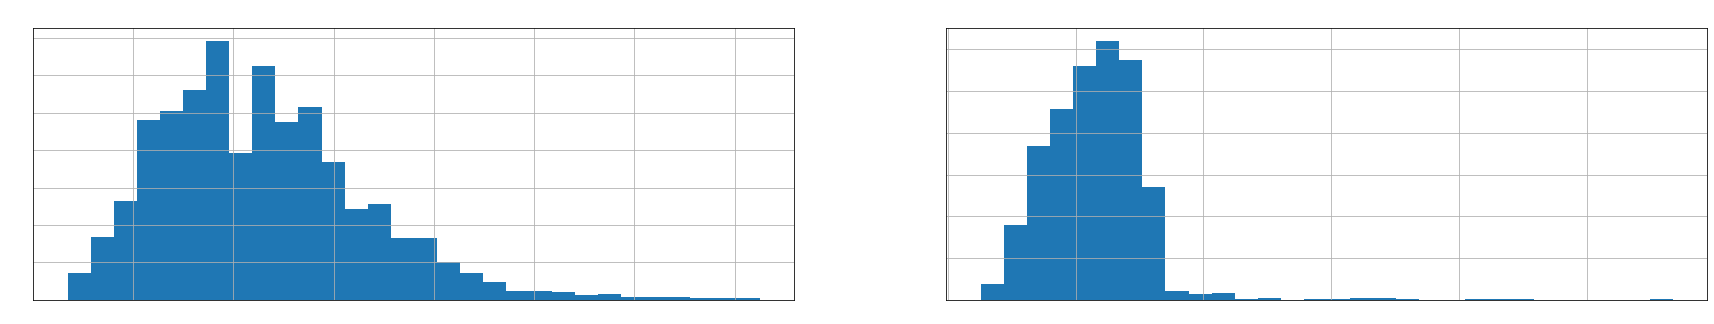

In [9]:
text_columns = ['title', 'description']

fig, axes = plt.subplots(1, 2, figsize = (30, 5))
for i, col in enumerate(text_columns):
    df[col].apply(len).hist(figure = fig, bins = 30, ax = axes[i])
    axes[i].set_title(col, fontdict = {'fontsize': 20})
plt.show()

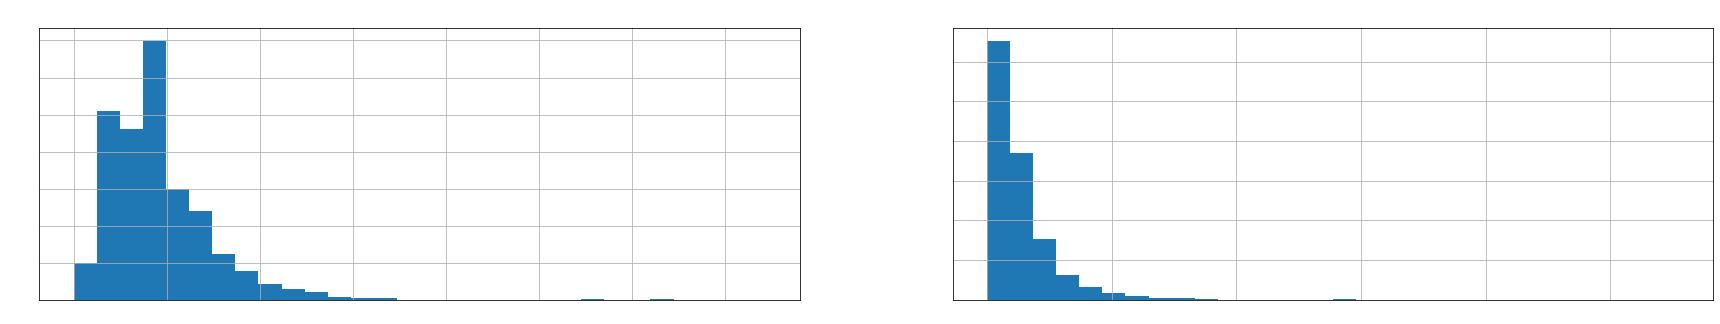

In [10]:
temp_data = {
    'title': [],
    'text': []
}

for i, item in df.iterrows():
    temp_data['title'].extend([l['header'] for l in item['content']])
    temp_data['text'].extend([l['text'] for l in item['content']])

temp = pd.DataFrame(temp_data)
fig, axes = plt.subplots(1, 2, figsize = (30, 5))
for i, col in enumerate(['title', 'text']):
    temp[col].apply(len).hist(figure = fig, bins = 30, ax = axes[i])
    axes[i].set_title(col, fontdict = {'fontsize': 20})
plt.show()

In [12]:
print('Examples of long titles:')
for i, item in df.iterrows():
    main_url = False
    for l1 in item['content']:
        if len(l1['header']) > 150:
            if not main_url:
                print(item['link'])
                main_url = True
            print(f'Item "{l1["header"]}" has lenght of over 150 chars')
    if main_url:
        print(' ')

Examples of long titles:
https://extension.okstate.edu/fact-sheets/what-if-engenia-fexapan-or-xtendimax-are-not-an-option-for-cotton-weed-control.html
Item "Recently the 9th Circuit Court vacated the labels for Engenia, FeXapan and Xtendimax
                        in cotton. What does that mean?
                     " has lenght of over 150 chars
Item "What are my options if I havent already purchased dicamba or need to make an application
                        after July 31st? 
                     " has lenght of over 150 chars
 
https://extension.okstate.edu/fact-sheets/what-if-engenia-fexapan-or-xtendimax-are-not-an-option-for-soybean-weed-control.html
Item "Recently the 9th Circuit Court vacated the labels for Engenia, FeXapan and Xtendimax
                        in soybean. What does that mean?
                     " has lenght of over 150 chars
Item "What are my options if I havent already purchased dicamba or need to make an application
                        after July 31

In [27]:
print('Examples of long content text:')
for i, item in df.iterrows():
    main_url = False
    for i1, l1 in enumerate(item['content']):
        if len(l1['text']) > 10000:
            if not main_url:
                print(item['link'])
                main_url = True
            print(f'{i1} Item "{l1["header"]}" has lenght of over 10000 chars - {len(l1["text"])}')
    if main_url:
        print(' ')
    

Examples of long content text:
https://extension.okstate.edu/fact-sheets/converting-introduced-grasses-to-rangeland.html
1 Item "Table 100" has lenght of over 10000 chars - 16825
 
https://extension.okstate.edu/fact-sheets/2022-annual-summary.html
1 Item "Overview:" has lenght of over 10000 chars - 25537
 
https://extension.okstate.edu/fact-sheets/2020-annual-summary-research-at-the-department-of-animal-and-food-sciences.html
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 20121
 
https://extension.okstate.edu/fact-sheets/true-cheat-control-in-oklahoma-winter-wheat.html
1 Item "Cultural and Mechanical Control Practices" has lenght of over 10000 chars - 10835
 
https://extension.okstate.edu/fact-sheets/understanding-grain-sorghum-irrigation-requirements-in-oklahoma.html
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 15421
 
https://extension.okstate.edu/fact-sheets/developing-an-income-statement.html
4 Item "Expenses" has lenght of over 10000 chars -

The following list of the long texts within `content` field:
```txt
Examples of long content text:
https://extension.okstate.edu/fact-sheets/converting-introduced-grasses-to-rangeland.html - expandable list
1 Item "Table 100" has lenght of over 10000 chars - 16825
 
https://extension.okstate.edu/fact-sheets/2022-annual-summary.html - expandable list
1 Item "Overview:" has lenght of over 10000 chars - 25537
 
https://extension.okstate.edu/fact-sheets/2020-annual-summary-research-at-the-department-of-animal-and-food-sciences.html - expandable list
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 20121
 
https://extension.okstate.edu/fact-sheets/true-cheat-control-in-oklahoma-winter-wheat.html - just a long text
1 Item "Cultural and Mechanical Control Practices" has lenght of over 10000 chars - 10835
 
https://extension.okstate.edu/fact-sheets/understanding-grain-sorghum-irrigation-requirements-in-oklahoma.html - 1st header (w/o introduction) contains other headers
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 15421
 
https://extension.okstate.edu/fact-sheets/developing-an-income-statement.html - just a long text
4 Item "Expenses" has lenght of over 10000 chars - 13947
 
https://extension.okstate.edu/fact-sheets/small-grain-aphids-in-oklahoma-and-their-management.html - 1st header (w/o introduction) contains other headers
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 18265
 
https://extension.okstate.edu/fact-sheets/plants-in-the-classroom-the-story-of-oklahoma-turfgrass.html - just a long text
3 Item "Grasses in Oklahoma" has lenght of over 10000 chars - 11555
 
https://extension.okstate.edu/fact-sheets/addressing-drainage-issues-in-the-urban-landscape.html - just a long text
2 Item "Selected Drainage Problems" has lenght of over 10000 chars - 14310
 
https://extension.okstate.edu/fact-sheets/2019-2020-small-grains-variety-performance-tests.html - just a long text with billions of tables
5 Item "Additional Information on the Web" has lenght of over 10000 chars - 15725
 
https://extension.okstate.edu/fact-sheets/coronavirus-sars-cov-2-and-the-covid-19-pandemic-what-is-it-and-how-does-it-spread.html - just a long text
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 12170
 
https://extension.okstate.edu/fact-sheets/2018-2019-small-grains-variety-performance-tests.html - just a long text with billion of tables
4 Item "Additional Information on the Web" has lenght of over 10000 chars - 17505
 
https://extension.okstate.edu/fact-sheets/crowdsourcing-in-the-food-industry.html - just a long text
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 12825
 
https://extension.okstate.edu/fact-sheets/canola-oil-properties.html - just a long text
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 10351
 
https://extension.okstate.edu/fact-sheets/big-data-and-opportunities-for-agricultural-and-food-industries.html - just a long text
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 14083
 
https://extension.okstate.edu/fact-sheets/2016-2017-winter-canola-performance-trials.html - 1st header (w/o introduction) contains other headers
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 10694
 
https://extension.okstate.edu/fact-sheets/dieta-y-osteoporosis.html - article in another language - long text
3 Item "Factores que afectan la densidad mineral sea" has lenght of over 10000 chars - 11619
 
https://extension.okstate.edu/fact-sheets/oklahoma-soil-fertility-handbook-full.html - 1st header (w/o intro) contains some headers
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 16884
50 Item "Correcting Soil Acidity" has lenght of over 10000 chars - 12115
109 Item "The Oklahoma Fertilizer Act and Rules" has lenght of over 10000 chars - 27757
110 Item "Oklahoma Soil amendment Act and Rules" has lenght of over 10000 chars - 13171
 
https://extension.okstate.edu/fact-sheets/limit-feeding-light-weight-cattle-high-nutrient-density-diets-programmed-feeding-for-calves-progfed2-revision-2.html - just a long text
4 Item "Questions and Answers about Programmed Feeding of Cattle" has lenght of over 10000 chars - 13912
 
https://extension.okstate.edu/fact-sheets/aquaculture-realities-and-potentials-when-getting-started.html - just a long text
6 Item "What should I produce?" has lenght of over 10000 chars - 11345
 
https://extension.okstate.edu/fact-sheets/the-internet-as-a-marketing-tool.html - just a long text
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 13267
 
https://extension.okstate.edu/fact-sheets/choosing-a-pest-management-company-to-protect-your-home-against-termites.html - just a long text
2 Item "What do you do when termites are discovered in your house?" has lenght of over 10000 chars - 14130
 
https://extension.okstate.edu/fact-sheets/internet-options-for-low-income-households-in-oklahoma.html - just a long text
1 Item "Low-cost Provider Options" has lenght of over 10000 chars - 12328
 
https://extension.okstate.edu/fact-sheets/nutritional-concerns-for-exercising-horses.html - just a long text
2 Item "Energy Needs for Exercising Horses" has lenght of over 10000 chars - 10436
 
https://extension.okstate.edu/fact-sheets/oklahoma-supergold-qa-late-season-supplementation-program-for-stocker-cattle.html - just a long text
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 22806
 
https://extension.okstate.edu/fact-sheets/another-farm-bill-expiration-how-did-we-get-here-what-does-it-mean-and-what-happens-now.html - just a long text
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 22365
 
https://extension.okstate.edu/fact-sheets/integrated-pest-management-of-cannas-for-production-in-controlled-environments.html - just a long text
2 Item "Integrated Pest Management" has lenght of over 10000 chars - 11027
 
https://extension.okstate.edu/fact-sheets/ecology-and-management-of-sericea-lespedeza.html - just a long text
10 Item "Herbicides" has lenght of over 10000 chars - 11407
 
https://extension.okstate.edu/fact-sheets/alfalfa-forage-insect-control-2.html - just a long text with bunch of tables
6 Item "Alfalfa Forage Insect Control Suggestions" has lenght of over 10000 chars - 13993
 
https://extension.okstate.edu/fact-sheets/growing-tomatoes-in-the-home-garden-2.html - just a long text
18 Item "Soil and Foliar/Fruit Surface Pests (See OSU Extension Facts EPP-7313)" has lenght of over 10000 chars - 12123
 
https://extension.okstate.edu/fact-sheets/alfalfa-stand-establishment_2017-1.html - just a long text
13 Item "Special Considerations" has lenght of over 10000 chars - 10607
 
https://extension.okstate.edu/fact-sheets/lease-hunting-opportunities-for-oklahoma-landowners.html - just a long text
20 Item "Developing a Written Lease Agreement" has lenght of over 10000 chars - 14654
23 Item "Lease Agreement" has lenght of over 10000 chars - 15294
 
https://extension.okstate.edu/fact-sheets/forage-legumes-for-oklahoma.html - just a long text
5 Item "Common(Kummerrowiastriata)" has lenght of over 10000 chars - 14378
 
https://extension.okstate.edu/fact-sheets/rodent-control-in-the-poultry-house.html - just a long text
2 Item "Controlling the Rodent Problem" has lenght of over 10000 chars - 11967
 
https://extension.okstate.edu/fact-sheets/conserving-beneficial-arthropods-in-residential-landscapes.html - just a long text
3 Item "Predators" has lenght of over 10000 chars - 19474
 
https://extension.okstate.edu/fact-sheets/oklahoma-gold-qa-late-season-supplementation-program-for-stocker-cattle.html - just a long text
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 12890
 
https://extension.okstate.edu/fact-sheets/marketing-basics-for-value-added-agriculture.html - just a long text
1 Item "Marketing Plans" has lenght of over 10000 chars - 11105
 
https://extension.okstate.edu/fact-sheets/lipid-glossary.html - just a long text
0 Item "Introduction-w/o-header" has lenght of over 10000 chars - 24163
```

### Final mapping

Need to think about the mapping. Maybe we should recreate the mapping so that it fits the requirements of having several clients.